# Mapping mining areas with text prompts

This notebook shows how to map mining areas with text prompts and the Segment Anything Model (SAM). 

To speed up the process, use GPU runtime for this notebook. 

## Install dependencies

Uncomment and run the following cell to install the required dependencies.

In [ ]:
%pip install git+https://github.com/opengeos/segment-geospatial

In [15]:
%pip install groundingdino-py leafmap localtileserver

Note: you may need to restart the kernel to use updated packages.
  Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import leafmap
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM

## Create an interactive map

In [22]:
m = leafmap.Map(center=[-6.054643555224412, -50.18255000697929], zoom=13, height="600px")
m.add_basemap("SATELLITE")
m

Map(center=[-6.054643555224412, -50.18255000697929], controls=(ZoomControl(options=['position', 'zoom_in_text'…

## Download a sample image

Pan and zoom the map to select the area of interest. Use the draw tools to draw a polygon or rectangle on the map

In [23]:
bbox = m.user_roi_bounds()
bbox

[-50.3523, -6.144, -50.09, -5.9678]

In [24]:
image = "Image.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=14, source="Satellite", overwrite=True)

Downloaded image 001/117
Downloaded image 002/117
Downloaded image 003/117
Downloaded image 004/117
Downloaded image 005/117
Downloaded image 006/117
Downloaded image 007/117
Downloaded image 008/117
Downloaded image 009/117
Downloaded image 010/117
Downloaded image 011/117
Downloaded image 012/117
Downloaded image 013/117
Downloaded image 014/117
Downloaded image 015/117
Downloaded image 016/117
Downloaded image 017/117
Downloaded image 018/117
Downloaded image 019/117
Downloaded image 020/117
Downloaded image 021/117
Downloaded image 022/117
Downloaded image 023/117
Downloaded image 024/117
Downloaded image 025/117
Downloaded image 026/117
Downloaded image 027/117
Downloaded image 028/117
Downloaded image 029/117
Downloaded image 030/117
Downloaded image 031/117
Downloaded image 032/117
Downloaded image 033/117
Downloaded image 034/117
Downloaded image 035/117
Downloaded image 036/117
Downloaded image 037/117
Downloaded image 038/117
Downloaded image 039/117
Downloaded image 040/117


You can also use your own image. Uncomment and run the following cell to use your own image.

In [ ]:
# image = '/path/to/your/own/image.tif'

Display the downloaded image on the map.

In [25]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(bottom=271420.0, center=[-6.151477964207542, -50.23807525634766], controls=(ZoomControl(options=['position…

## Initialize LangSAM class

The initialization of the LangSAM class might take a few minutes. The initialization downloads the model weights and sets up the model for inference.

In [12]:
sam = LangSAM()

GroundingDINO_SwinB.cfg.py:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

groundingdino_swinb_cogcoor.pth:   0%|          | 0.00/938M [00:00<?, ?B/s]

Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /home/jovyan/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:08<00:00, 315MB/s] 


## Specify text prompts

In [27]:
text_prompt = "mine"

## Segment the image

Part of the model prediction includes setting appropriate thresholds for object detection and text association with the detected objects. These threshold values range from 0 to 1 and are set while calling the predict method of the LangSAM class.

`box_threshold`: This value is used for object detection in the image. A higher value makes the model more selective, identifying only the most confident object instances, leading to fewer overall detections. A lower value, conversely, makes the model more tolerant, leading to increased detections, including potentially less confident ones.

`text_threshold`: This value is used to associate the detected objects with the provided text prompt. A higher value requires a stronger association between the object and the text prompt, leading to more precise but potentially fewer associations. A lower value allows for looser associations, which could increase the number of associations but also introduce less precise matches.

Remember to test different threshold values on your specific data. The optimal threshold can vary depending on the quality and nature of your images, as well as the specificity of your text prompts. Make sure to choose a balance that suits your requirements, whether that's precision or recall.

In [28]:
sam.predict(image, text_prompt, box_threshold=0.24, text_threshold=0.24)

## Visualize the results

Show the result with bounding boxes on the map.

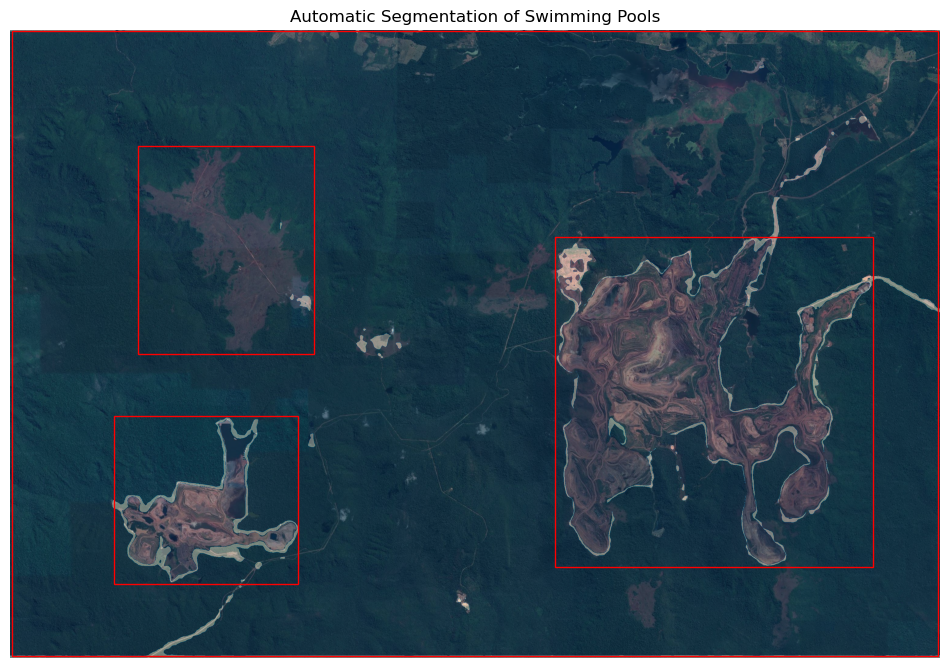

In [29]:
sam.show_anns(
    cmap="Blues",
    box_color="red",
    title="Automatic Segmentation of Swimming Pools",
    blend=True,
)

Show the result without bounding boxes on the map.

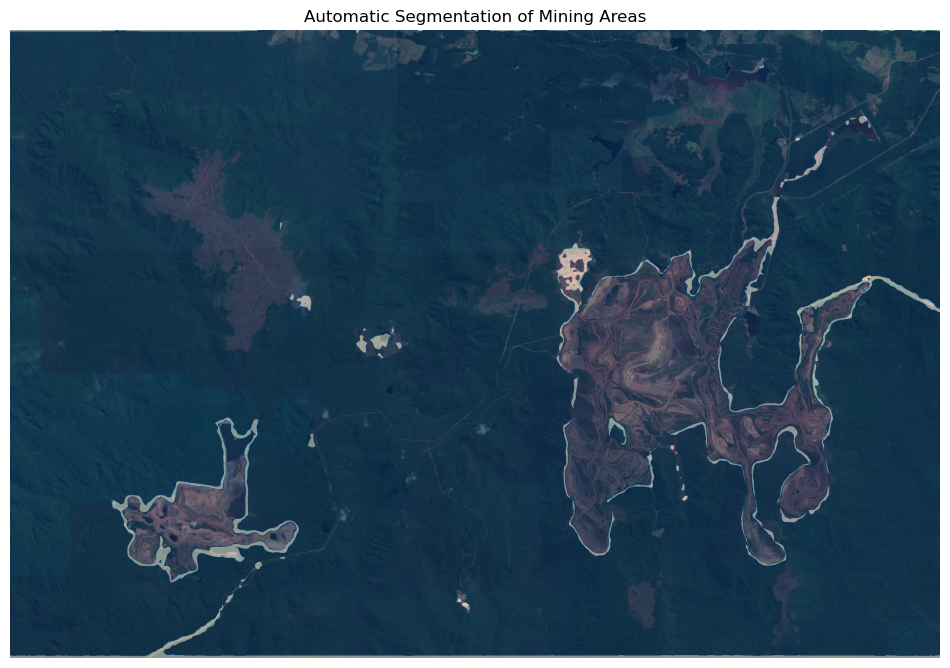

In [31]:
sam.show_anns(
    cmap="Blues",
    add_boxes=False,
    alpha=0.5,
    title="Automatic Segmentation of Mining Areas",
)

Show the result as a grayscale image.

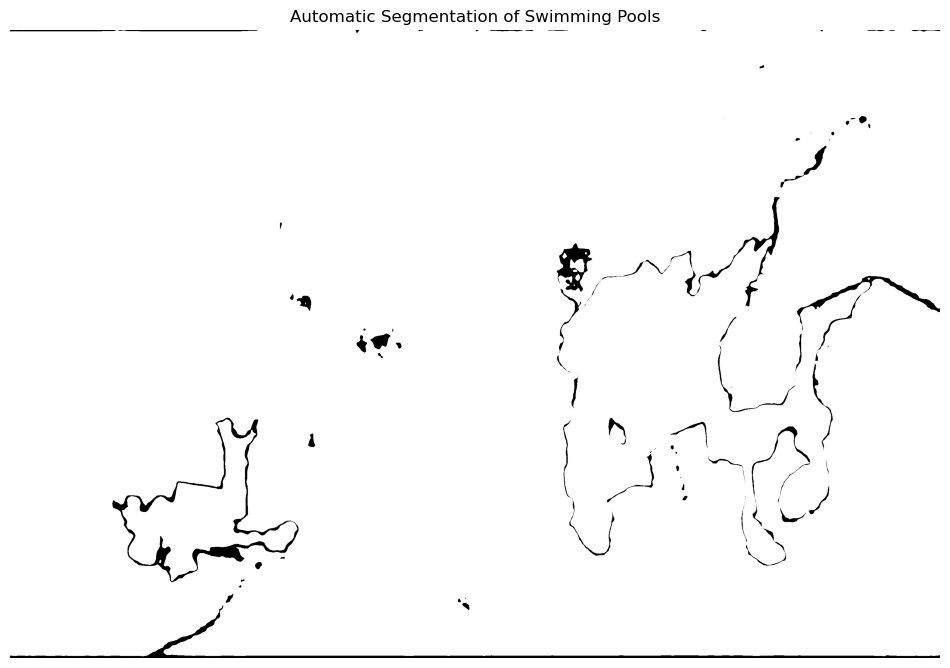

In [30]:
sam.show_anns(
    cmap="Greys_r",
    add_boxes=False,
    alpha=1,
    title="Automatic Segmentation of Mining areas",
    blend=False,
    output="pools.tif",
)

Convert the result to a vector format.  

In [32]:
sam.raster_to_vector("pools.tif", "pools.shp")

Show the results on the interactive map.

In [33]:
m.add_raster("pools.tif", layer_name="Pools", palette="Blues", opacity=0.5, nodata=0)
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector("pools.shp", layer_name="Vector", style=style)
m

Map(bottom=271377.0, center=[-6.122121405397511, -50.06916046142578], controls=(ZoomControl(options=['position…

## Interactive segmentation

In [34]:
sam.show_map()

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…